In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
files_enrollment = ["data/1api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv",
                   "data/1api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv",
                   "data/1api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv"]

df1 = pd.concat([pd.read_csv(f) for f in files_enrollment], ignore_index=True)

print("Total enrollment records:", len(df1))

Total enrollment records: 1006029


Clean state data in Enrollment Data 

In [4]:
print("Unique raw states: ", df1["state"].nunique())
print(df1['state'].value_counts())


Unique raw states:  55
state
Uttar Pradesh                                   110369
Tamil Nadu                                       92552
Maharashtra                                      77191
West Bengal                                      76519
Karnataka                                        70198
Andhra Pradesh                                   65658
Bihar                                            60567
Rajasthan                                        56159
Madhya Pradesh                                   50225
Gujarat                                          46624
Odisha                                           43691
Telangana                                        42774
Kerala                                           39145
Assam                                            31827
Jharkhand                                        23218
Punjab                                           20439
Chhattisgarh                                     18550
Haryana                             

In [5]:
df1["state_clean"]=df1['state'].str.lower().str.strip()

print(sorted(df1['state_clean'].unique()))
print("Unique raw states: ", df1['state_clean'].nunique())
print(df1['state_clean'].value_counts())

['100000', 'andaman & nicobar islands', 'andaman and nicobar islands', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'dadra & nagar haveli', 'dadra and nagar haveli', 'dadra and nagar haveli and daman and diu', 'daman & diu', 'daman and diu', 'delhi', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jammu & kashmir', 'jammu and kashmir', 'jharkhand', 'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'orissa', 'pondicherry', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana', 'the dadra and nagar haveli and daman and diu', 'tripura', 'uttar pradesh', 'uttarakhand', 'west  bengal', 'west bangal', 'west bengal', 'westbengal']
Unique raw states:  49
state_clean
uttar pradesh                                   110369
tamil nadu                                       92552
maharashtra                                      77191
west bengal      

In [6]:
fix_map = {
    "andaman & nicobar": "andaman and nicobar islands",
    "andaman and nicobar": "andaman and nicobar islands",
    "andaman & nicobar islands": "andaman and nicobar islands",
    "orissa": "odisha",
    
    "pondicherry": "puducherry",
    
    "west bangal": "west bengal",
    "westbengal": "west bengal",
    "west  bengal": "west bengal",
    
    "jammu & kashmir": "jammu and kashmir",
    
    "dadra & nagar haveli": "dadra and nagar haveli and  daman and diu",
    "dadra and nagar haveli": "dadra and nagar haveli and  daman and diu",
    "daman and diu": "dadra and nagar haveli and  daman and diu",
    "daman & diu": "dadra and nagar haveli and  daman and diu",
    "dadra and nagar haveli and  daman and diu": "dadra and nagar haveli and  daman and diu",
    "dadra and nagar haveli and daman and diu": "dadra and nagar haveli and  daman and diu",
    "the dadra and nagar haveli and daman and diu": "dadra and nagar haveli and  daman and diu",
    
    "100000" : None
    }


In [7]:
df1["state_clean"] = df1["state_clean"].replace(fix_map)
df1 = df1[df1["state_clean"].notna()]
print(sorted(df1["state_clean"].unique()))
print("Unique raw states: ", df1["state_clean"].nunique())
print(df1["state_clean"].value_counts())

['andaman and nicobar islands', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'dadra and nagar haveli and  daman and diu', 'delhi', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jammu and kashmir', 'jharkhand', 'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana', 'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']
Unique raw states:  36
state_clean
uttar pradesh                                110369
tamil nadu                                    92552
maharashtra                                   77191
west bengal                                   76561
karnataka                                     70198
andhra pradesh                                65663
bihar                                         60567
rajasthan                                     56159
madhya pradesh         

Clean district in enrolment data

In [8]:
print("Unique raw district: ", df1["district"].nunique())
print(df1["district"].value_counts())


Unique raw district:  984
district
Pune                 6663
North 24 Parganas    6488
Barddhaman           5362
Bengaluru            5305
Hyderabad            4984
                     ... 
punch                   1
Balotra                 1
ANGUL                   1
Salumbar                1
Beawar                  1
Name: count, Length: 984, dtype: int64


In [9]:
df1["district_clean"]=df1['district'].str.lower().str.strip()

print(sorted(df1['district_clean'].unique()))
print("Unique raw district: ", df1['district_clean'].nunique())
print(df1['district_clean'].value_counts())

['24 paraganas north', '24 paraganas south', 'adilabad', 'agar malwa', 'agra', 'ahilyanagar', 'ahmadabad', 'ahmadnagar', 'ahmed nagar', 'ahmedabad', 'ahmednagar', 'aizawl', 'ajmer', 'akola', 'alappuzha', 'aligarh', 'alipurduar', 'alirajpur', 'allahabad', 'alluri sitharama raju', 'almora', 'alwar', 'ambala', 'ambedkar nagar', 'amethi', 'amravati', 'amreli', 'amritsar', 'amroha', 'anakapalli', 'anand', 'anantapur', 'ananthapur', 'ananthapuramu', 'anantnag', 'andamans', 'angul', 'anjaw', 'annamayya', 'anugal', 'anugul', 'anuppur', 'araria', 'ariyalur', 'arvalli', 'arwal', 'ashok nagar', 'ashoknagar', 'auraiya', 'aurangabad', 'aurangabad(bh)', 'ayodhya', 'azamgarh', 'badgam', 'bagalkot', 'bagalkot *', 'bageshwar', 'baghpat', 'bagpat', 'bahraich', 'bajali', 'baksa', 'balaghat', 'balangir', 'baleshwar', 'baleswar', 'ballari', 'ballia', 'balod', 'baloda bazar', 'balotra', 'balrampur', 'banas kantha', 'banaskantha', 'banda', 'bandipore', 'bandipur', 'bangalore', 'bangalore rural', 'banka', 'ba

In [10]:
fix_map = {
    "allahabad": "prayagraj",
    "faizabad": "ayodhya",
    "hoshangabad": "narmadapuram",
    "ahmednagar": "ahilyanagar",
    "ahmadnagar": "ahilyanagar",
    "ahmed nagar": "ahilyanagar",
    "osmanabad": "dharashiv",

    "bangalore": "bengaluru",
    "bangalore urban": "bengaluru urban",
    "bangalore rural": "bengaluru rural",
    "calcutta": "kolkata",
    "madras": "chennai",
    "trivandrum": "thiruvananthapuram",
    "mysore": "mysuru",

    "bellary": "ballari",
    "bijapur": "vijayapura",
    "chickmagalur": "chikkamagaluru",
    "chikmagalur": "chikkamagaluru",
    "chickballapur": "chikkaballapura",
    "chikballapur": "chikkaballapura",
    "gulbarga": "kalaburagi",

    "greater mumbai": "mumbai",
    "mumbai suburban": "mumbai",
    "mumbai city": "mumbai",
    "mumbai( sub urban )": "mumbai",
    "bombay": "mumbai",
    "poona": "pune",

    "rangareddy": "ranga reddy",
    "rangareddi": "ranga reddy",
    "k.v. rangareddy": "ranga reddy",
    "k.v.rangareddy": "ranga reddy",
    "cuddapah": "ysr kadapa",
    "kadapa": "ysr kadapa",
    "ysr": "ysr kadapa",
    "y s r": "ysr kadapa",
    "y. s. r": "ysr kadapa",
    "vizag": "visakhapatnam",
    "visakhapatanam": "visakhapatnam",
    "ananthapur": "ananthapuramu",
    "anantapur": "ananthapuramu",

    "tuticorin": "thoothukudi",
    "tiruvallur": "thiruvallur",
    "kancheepuram": "kanchipuram",
    "vellore rural": "vellore",
    "tirupathur": "tirupattur",
    "villupuram": "viluppuram",

    "palghat": "palakkad",
    "cannanore": "kannur",
    "alleppey": "alappuzha",
    "cochin": "ernakulam",
    "quilion": "kollam",
    "quilon": "kollam",
    "trichur": "thrissur",

    "balasore": "baleshwar",
    "cuttack sadar": "cuttack",

    "sibsagar": "sivasagar",
    "darrang": "darang",
    "gauhati": "kamrup metro",
    "north cachar hills": "dima hasao",

    "purnea": "purnia",
    "samstipur": "samastipur",

    "durg bhilai": "durg",

    "leh ladakh": "leh",
    "kargil ladakh": "kargil",

    "ahmadabad": "ahmedabad",
    "ahmedabad city": "ahmedabad",
    "ahmedabad rural": "ahmedabad",
    "baroda": "vadodara",

    "24 paraganas north": "north 24 parganas",
    "north twenty four parganas": "north 24 parganas",
    "24 paraganas south": "south 24 parganas",
    "south twenty four parganas": "south 24 parganas",
    "medinipur": "paschim medinipur",
    "west midnapore": "paschim medinipur",
    "east midnapore": "purba medinipur",
    "bardhaman east": "purba bardhaman",
    "barddhaman": "purba bardhaman",
    "bardhaman": "purba bardhaman",
    "burdwan": "purba bardhaman",
    "bardhaman west": "paschim bardhaman",
    "hooghiy": "hooghly",
    "hugli": "hooghly",
    "hawrah": "howrah",
    "haora": "howrah",

    "banaras": "varanasi",

    "gurgaon": "gurugram",
    "yamuna nagar": "yamunanagar",

    "pondicherry": "puducherry",

    "aurangabad(bh)": "aurangabad",
    "ashoknagar": "ashok nagar",
    "east nimar": "khandwa",
    "west nimar": "khargone",

    "bagpat": "baghpat",
    "belgaum": "belagavi",
    "bid": "beed",
    "bijapur(kar)": "vijayapura",
    "sheikpura": "sheikhpura",
    "shrawasti": "shravasti",
    "siddharthnagar": "siddharth nagar",
    "surendra nagar": "surendranagar",
    "warangal (urban)": "warangal",
    "warangal urban": "warangal",
    "warangal rural": "warangal",

    "bokaro *": "bokaro",
    "bagalkot *": "bagalkot",
    "gadag *": "gadag",
    "harda *": "harda",
    "haveri *": "haveri",
    "hingoli *": "hingoli",
    "namakkal   *": "namakkal",
    "kendrapara *": "kendrapara",
    "udupi *": "udupi",
    "washim *": "washim",

    "the nilgiris": "nilgiris",
    "the dangs": "dang",
    "nicobars": "nicobar",

    "na": None,
    "n a": None,
    "null": None,
    "unknown": None,
    "0": None,
    "100000": None,
    "northeast   *": None,
    "north and middle andaman": None,
    "andamans": None,
    "east": None,
    "west": None,
    "north": None,
    "south": None,
    "new delhi": None,
    "najafgarh": None,
}

In [11]:
pd.set_option('display.max_rows', 1000)
df1["district_clean"] = df1["district_clean"].replace(fix_map)
df1 = df1[df1["district_clean"].map(df1["district_clean"].value_counts()) >= 10]
df1 = df1[df1["district_clean"].notna()]
print(sorted(df1["district_clean"].unique()))
print("Unique raw districts: ", df1["district_clean"].nunique())
print(df1["district_clean"].value_counts())


['adilabad', 'agar malwa', 'agra', 'ahilyanagar', 'ahmedabad', 'aizawl', 'ajmer', 'akola', 'alappuzha', 'aligarh', 'alipurduar', 'alirajpur', 'alluri sitharama raju', 'almora', 'alwar', 'ambala', 'ambedkar nagar', 'amethi', 'amravati', 'amreli', 'amritsar', 'amroha', 'anakapalli', 'anand', 'ananthapuramu', 'anantnag', 'angul', 'anjaw', 'annamayya', 'anugul', 'anuppur', 'araria', 'ariyalur', 'arvalli', 'arwal', 'ashok nagar', 'auraiya', 'aurangabad', 'ayodhya', 'azamgarh', 'badgam', 'bagalkot', 'bageshwar', 'baghpat', 'bahraich', 'bajali', 'baksa', 'balaghat', 'balangir', 'baleshwar', 'baleswar', 'ballari', 'ballia', 'balod', 'baloda bazar', 'balrampur', 'banas kantha', 'banaskantha', 'banda', 'bandipore', 'banka', 'bankura', 'banswara', 'bapatla', 'bara banki', 'barabanki', 'baramula', 'baran', 'bareilly', 'bargarh', 'barmer', 'barnala', 'barpeta', 'barwani', 'bastar', 'basti', 'bathinda', 'baudh', 'beed', 'begusarai', 'belagavi', 'bemetara', 'bengaluru', 'bengaluru rural', 'bengaluru 

Finding Insights from here 

Top and Bottom 10 states in enrollment 

In [12]:
df1["total_enrolments"] = (df1["age_0_5"] + df1["age_5_17"] + df1["age_18_greater"])
state_summary = (df1.groupby("state_clean")["total_enrolments"].sum().reset_index().sort_values(by="total_enrolments", ascending=False))
print(state_summary)

                                  state_clean  total_enrolments
33                              uttar pradesh           1017050
4                                       bihar            609585
19                             madhya pradesh            493970
35                                west bengal            373693
20                                maharashtra            369139
28                                  rajasthan            347959
10                                    gujarat            280549
3                                       assam            230197
15                                  karnataka            223031
30                                 tamil nadu            220786
14                                  jharkhand            156092
31                                  telangana            130868
1                              andhra pradesh            127686
25                                     odisha            122542
22                                  megh

In [13]:
state_summary = state_summary.reset_index(drop=True)
state_summary["Overall_Rank"] = range(1, len(state_summary)+1)
top10 = state_summary.head(10).copy()
top10=top10.reset_index(drop=True)
top10["Top10 Rank"] = range(1, len(top10) + 1)
print("/n Top 10 states by enrolments:")
print(top10[["Top10 Rank", "state_clean", "total_enrolments"]].to_string(index=False))

/n Top 10 states by enrolments:
 Top10 Rank    state_clean  total_enrolments
          1  uttar pradesh           1017050
          2          bihar            609585
          3 madhya pradesh            493970
          4    west bengal            373693
          5    maharashtra            369139
          6      rajasthan            347959
          7        gujarat            280549
          8          assam            230197
          9      karnataka            223031
         10     tamil nadu            220786


In [14]:
bottom10 = state_summary.tail(10).copy()
bottom10=bottom10.reset_index(drop=True)
bottom10["Bottom10 Rank"] = range(1, len(bottom10) + 1)
print("/n Bottom 10 states by enrolments:")
print(bottom10[["Bottom10 Rank", "state_clean", "total_enrolments"]].to_string(index=False))

/n Bottom 10 states by enrolments:
 Bottom10 Rank                               state_clean  total_enrolments
             1                                   mizoram              5912
             2                         arunachal pradesh              4327
             3                                puducherry              3017
             4                                chandigarh              2723
             5                                       goa              2331
             6 dadra and nagar haveli and  daman and diu              1799
             7                                    sikkim              1385
             8                                    ladakh               617
             9               andaman and nicobar islands               304
            10                               lakshadweep               203


Visualizing from here 


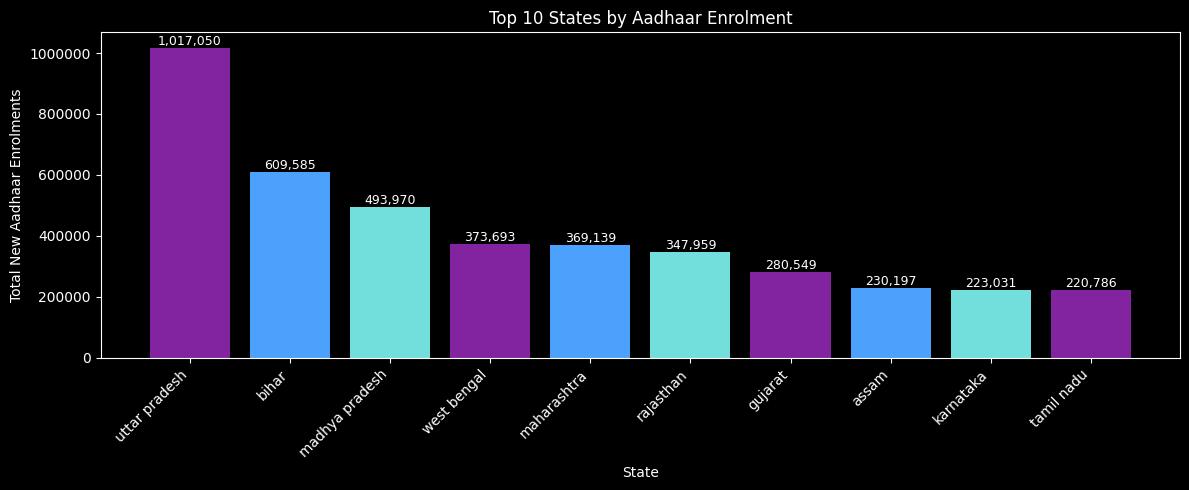

In [15]:
# for top 10 states, plot a bar chart
import matplotlib.pyplot as plt
colors = ["#82249f", "#4CA1FC", "#72dfdd"]

plt.figure(figsize=(12,5))
bars = plt.bar(
    top10["state_clean"],
    top10["total_enrolments"],
    color=colors * 4  
)


plt.xticks(rotation=45, ha="right")
plt.title("Top 10 States by Aadhaar Enrolment")
plt.xlabel("State")
plt.ylabel("Total New Aadhaar Enrolments")
plt.ticklabel_format(style="plain", axis="y")

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{int(h):,}",
             ha="center", va="bottom", fontsize=9)

plt.tight_layout()


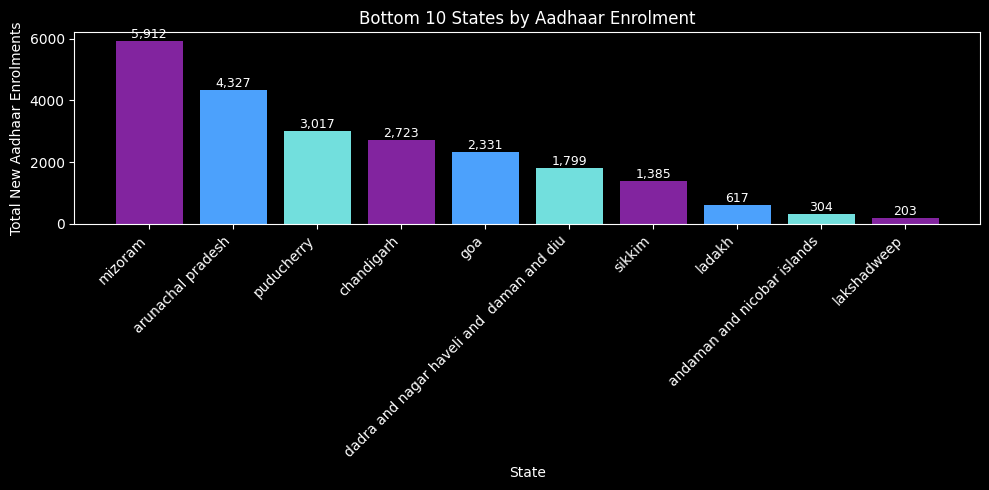

In [16]:
# for bottom 10 states, plot a bar chart
plt.figure(figsize=(10,5))
bars = plt.bar(
    bottom10["state_clean"],
    bottom10["total_enrolments"],
    color=colors * 4
)

plt.xticks(rotation=45, ha="right")
plt.title("Bottom 10 States by Aadhaar Enrolment")
plt.xlabel("State")
plt.ylabel("Total New Aadhaar Enrolments")
plt.ticklabel_format(style="plain", axis="y")

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{int(h):,}",
             ha="center", va="bottom", fontsize=9)

plt.tight_layout()


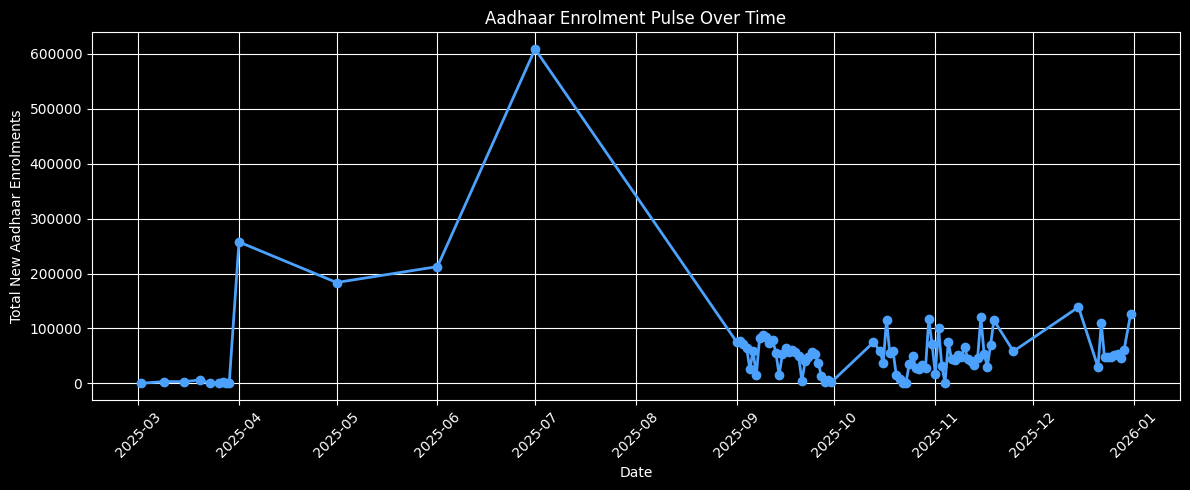

In [17]:
# ===== REQUIRED: create daily_pulse BEFORE plotting =====

df1["date"] = pd.to_datetime(
    df1["date"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)

df1 = df1[df1["date"].notna()]

daily_pulse = (
    df1.groupby("date")["total_enrolments"]
      .sum()
      .reset_index()
)
plt.figure(figsize=(12,5))
plt.plot(
    daily_pulse["date"],
    daily_pulse["total_enrolments"],
    color=colors[1],   # pick any one
    marker="o",
    linewidth=2
)

plt.title("Aadhaar Enrolment Pulse Over Time")
plt.xlabel("Date")
plt.ylabel("Total New Aadhaar Enrolments")
plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

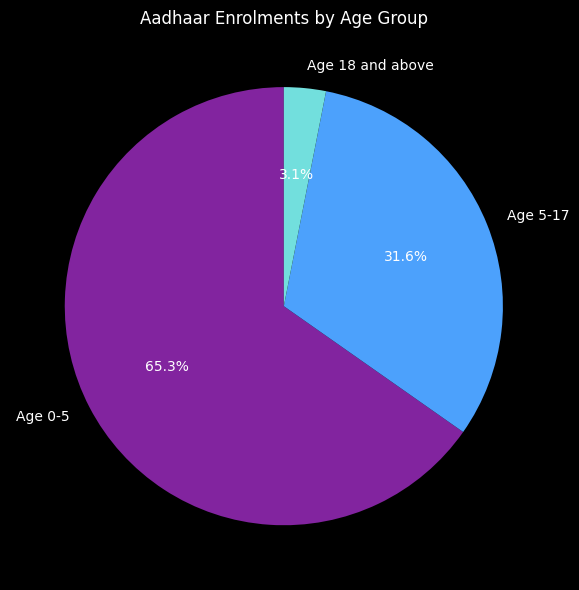

In [18]:
# pie chart 
plt.figure(figsize=(6,6))
plt.pie([df1['age_0_5'].sum(), df1['age_5_17'].sum(), df1['age_18_greater'].sum()], 
        labels=["Age 0-5", "Age 5-17", "Age 18 and above"], 
        autopct=lambda p: f"{p:.1f}%",
        startangle=90,
        colors=colors
       )
plt.title("Aadhaar Enrolments by Age Group")
plt.tight_layout()
plt.show()